In [42]:
import numpy as np
from matplotlib import pyplot as plt

length = 5
dx=0.01
k = 0.466
t = 300
delta_t = 0.001


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    derTemp = (k/2)*(((T3-T2)-(T2-T1))/dx**2) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,p_amnt:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(t,p_amnt+2))
    simulation[0,1:p_amnt+1]=init_conditions
    for i in range(1,t):
        for j in range(1,p_amnt+1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,p_amnt+1]=simulation[i,p_amnt-1]
        simulation[i,0]=simulation[i,2]
    return simulation

init_conditions = np.zeros(int(length/dx))
init_conditions[5] = 2
simulation = heat_simulation(init_conditions,int(length/dx),k,t,delta_t)



/tmp/ipykernel_20107/4220897132.py:21: RuntimeWarning: overflow encountered in scalar divide
  derTemp = (k/2)*(((T3-T2)-(T2-T1))/dx**2)
/tmp/ipykernel_20107/4220897132.py:22: RuntimeWarning: invalid value encountered in scalar add
  return derTemp*delta_t+T2


[ 2.74687943e+07 -1.34396676e+08  5.94722493e+08 -1.56711044e+09
  2.72292645e+09 -3.25975244e+09  2.72292645e+09 -1.56711044e+09
  5.94722493e+08 -1.34396676e+08]


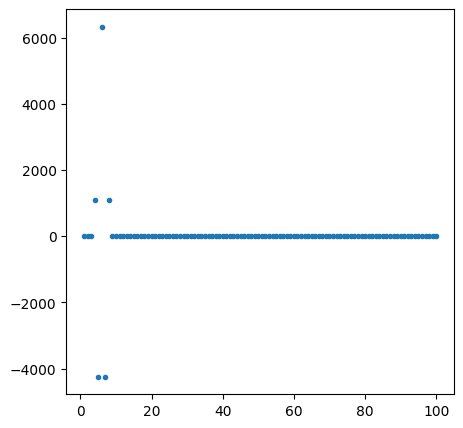

In [43]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax=plt.plot(np.arange(1,101),simulation[2,1:101],".")
#for index,gen in enumerate(simulation):
#    ax[index]=plt.plot(np.arange(0,10),gen)
print(simulation[5,1:11])


In [39]:
x=3
1<x<4

True